In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
import pylab as plb
plb.rcParams['pdf.fonttype'] = 42

Populating the interactive namespace from numpy and matplotlib


In [2]:
import db_access as dba

In [3]:
fly_db = dba.get_db()

In [4]:
import group_data as gd

In [5]:
fly = gd.swarms['GMR22H05_pr'].flies[1]

In [6]:
muscle_data = fly.get_pkl_data('nnls_fits_bk_sub_F.cpkl')

In [7]:
X = muscle_data['fits']

In [41]:
X_ = X[:,1800:2500]

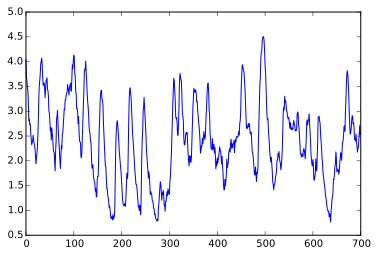

In [39]:
#plot(X[4,1800:2500])

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
X_std = StandardScaler().fit_transform(X_)

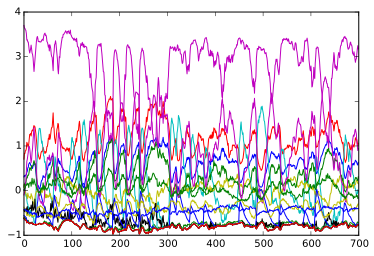

In [47]:
plot(X_std[:,:9000].T)

In [48]:
u,s,v = np.linalg.svd(X_std)

In [49]:
for ev in u:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [50]:
eig_pairs = [(np.abs(s[i]),u[i]) for i in range(len(s))]

In [51]:
eig_pairs.sort()
eig_pairs.reverse()

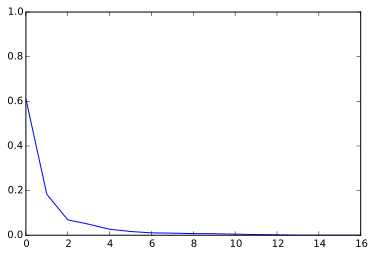

In [57]:
tot_var = sum(s)
plot([x[0]/tot_var for x in eig_pairs])
gca().set_ybound(0,1)
plb.savefig('eigenvals.pdf')

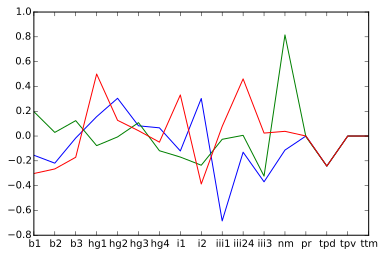

In [58]:
plot(eig_pairs[0][1])
plot(eig_pairs[1][1])
plot(eig_pairs[2][1])
ax = gca()
ax.set_xticks(np.arange(len(muscle_data['muscles'])))
tlbs = ax.set_xticklabels(muscle_data['muscles'])
plb.savefig('eigenvecs.pdf')